## <center>  Trabalho I - Criptografia </center>
#### João Vitor Chaves de Oliveira
#### Professor Cristiano Bacelar de Oliveira

####  Descrição do projeto:

<p>A ideia do gerador é obter as cotações do IBOVESPA em tempo real, assim conseguimos obter uma maior imprevisibilidade. Entretando, devido a falta de ferramentas grátis para obtenção dessas informações em tempo real, simularemos a obtenção desse números a partir de uma base de dados referente ao histórico de cotações do IBOVESPA no período de cerca de 1 ano. O conjunto de dados que foi obtido possui várias informações como pontuação média, mínima e máxima bem como variação do dia em porcentagem. Geramos o número da seguinte forma: obtemos o valor da pontuação máxima do dia e multiplicamos pela pela variação do dia. 

<p> A base de dados foi obtida do site [Infomoney](www.infomoney.com.br) com o histórico de cotações do IBOVESPA de 09-12-2016 a 12-09-2017. IBOVESPA é a sigla de Índice da Bolsa de Valores de São Paulo, e é um indicador de desempenho das ações negociadas na BOVESPA. A BOVESPA é a maior bolsa de valores da América Latina. É um indicador muito importante no mercado financeiro, pois é ele que mede o desempenho médio das cotações de ações, e o índice se dá pelas ações com maior volume negociado nos últimos meses.


#### Teste de aleatóriedade descrito no NIST SP 800-22 - Frequency Test within a Block

1. Particione a sequência de entrada em N = $\lfloor \frac{n}{M} \rfloor$ blocos não sobrepostos. Descarte os bits não utilizados. Exemplo: n = 10, M = 3 e $\varepsilon$ = 0110011010. Neste caso, 3 blocos seriam criados com N = 3 consistindo em (011),(001) e (101). O 0 final seria descartado.

2. Determine a proporção $\pi_{i}$ = $\frac{\sum_{j=1}^{M} \varepsilon_{(i-1)M+j}}{M}$.
Neste exemplo temos que $\pi_{1} = \frac{2}{3}$, $\pi_{2} = \frac{1}{3}$ e $\pi_{3} = \frac{2}{3}$. 

3. Compute a  estatística $\chi^2$ = 4 M $\sum_{i=1}^{N} (\pi_{i}- \frac{1}{2})^2 $.  Por exemplo $\chi^2(obs) = 4*3*((\frac{2}{3}-\frac{1}{2})^2+(\frac{1}{3}-\frac{1}{2})^2+(\frac{2}{3}-\frac{1}{2})^2) = 1 $

4. Compute P-value = $\textbf{igamc}$($\frac{N}{2},\frac{\chi^2(obs)}{2}$), onde $\textbf{igamc}$ é a função gama incompleta.

Se o P-value computado for < 0.01, então se conclue que a sequência é não-aleatória. Caso contrário, concluimos que a sequência é aleatória.

Nota: É recomendado que cada sequência a ser testada consista de um mínimo de 100 bits.

In [128]:
from scipy import special
import math

In [129]:
def BlockFrequency(M,n,string_bit):
    print("(Entrada)         n = ",n)
    print("(Entrada)         M = ",M)
    # M é o comprimento de cada bloco
    # n é o comprimento da string de bits
    
    #Passo 1
    N = math.floor(n/M)
    print("(Processamento)   N = ",N)
    
    #Passo 2
    lista = []
    
    for i in range(N):
        soma = 0
        for j in range(M):
            soma += int(string_bit[(i)*M+j])
        lista.append(soma/M)
    
    
    #Passo 3
    X_obs = 0
    for i in range(N):
        X_obs += ((lista[i]-0.5)*(lista[i]-0.5))
    
    X_obs = X_obs*4*M
    print("(Processamento)  X² = ",X_obs)
    
    #Passo 4
    P_value = special.gammaincc(N/2,X_obs/2)
    print("(Saída)          P-value = ",P_value)
    if(P_value<0.01):
        print("A sequência não é aleatória")
    else:
        print("A sequência é aleatória")

In [130]:
#string_bit1 = '0111111111111' 
#string_bit2 = '0110011010'
string_bit = '1100100100001111110110101010001000100001011010001100001000110100110001001100011001100010100010111000'
BlockFrequency(10,100,string_bit)

(Entrada)         n =  100
(Entrada)         M =  10
(Processamento)   N =  10
(Processamento)  X² =  7.199999999999999
(Saída)          P-value =  0.706438449641
A sequência é aleatória


#### Gerador de números aleatórios

In [131]:
import pandas as pd

In [132]:
dataFrame = pd.read_excel('dataFrame_historico.xlsx')

In [133]:
dataFrame

,Data,Histórico,Variacao_dia_porcentagem,Abertura,Minimo,Medio,Maximo,Volume,Negocios
0,2017-09-12,74539,0.30,74322.04,74294,74892,75332,9835255934,1090992
1,2017-09-11,74319,1.70,73095.62,73096,74314,74636,9518696778,1155872
2,2017-09-08,73079,-0.45,73413.40,72925,73163,73646,8485853744,1096322
3,2017-09-06,73412,1.75,72156.81,72157,73259,73608,11048251819,1464046
4,2017-09-05,72151,0.03,72134.02,71827,72289,73180,10891406700,1471893
5,2017-09-04,72129,0.29,71921.46,71671,71941,72141,5393740081,745106
6,2017-09-01,71923,1.54,70848.16,70846,71940,72217,9887147354,1180447
7,2017-08-31,70835,-0.07,70887.11,70516,70821,71234,12106529308,1128327
8,2017-08-30,70886,-0.62,71327.97,70755,70914,71454,7303461189,1042461
9,2017-08-29,71330,0.44,71005.06,70517,71031,71330,6474841534,929622


##### A função abaixo, converte de decimal para binário os números obtidos para que possamos obter os bits.

In [134]:
def dec2any(dec,base_final):
    base_final = int(base_final)
    dec = int(dec)
    dic = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    numero_final_temp = []
    numero_final = ''
    while True:
        temp_numero_final = dec%base_final
        numero_final_temp.append(temp_numero_final)
        if int(dec/base_final) == 0:
            break
        dec = int(dec/base_final)
    numero_final_temp.reverse()
    for i in numero_final_temp:
        numero_final += dic[i]     
    return numero_final

#### 1. Amostra com números gerados diretamente pelo processo escolhido.

In [135]:
dataFrame.head()

,Data,Histórico,Variacao_dia_porcentagem,Abertura,Minimo,Medio,Maximo,Volume,Negocios
0,2017-09-12,74539,0.30,74322.04,74294,74892,75332,9835255934,1090992
1,2017-09-11,74319,1.70,73095.62,73096,74314,74636,9518696778,1155872
2,2017-09-08,73079,-0.45,73413.40,72925,73163,73646,8485853744,1096322
3,2017-09-06,73412,1.75,72156.81,72157,73259,73608,11048251819,1464046
4,2017-09-05,72151,0.03,72134.02,71827,72289,73180,10891406700,1471893


In [136]:
string_bits = ''
#for i in range(len(dataFrame['Maximo'])):
for i in range(30):
    string_bits+=dec2any(int(dataFrame['Maximo'][i]*dataFrame['Variacao_dia_porcentagem'][i]),2)
print(string_bits)
print("Tamanho: ",len(string_bits))


101100001000111111101111101000011000000101110100111110111001011101000100100111010001101110001101100100110111010011011110101010110100001101111101010011001101100100111110110010110001000000101100101110110101111110111000100111110010101000000110000010010010011111000111100010010100010111100100010011010111001001011011110101011110010001010010001000010000101011110110100010101110000000011101100111101010001110111100101110100010110011110111110100011001111110101000101001
Tamanho:  462


In [137]:
BlockFrequency(30,len(string_bits),string_bits)

(Entrada)         n =  462
(Entrada)         M =  30
(Processamento)   N =  15
(Processamento)  X² =  7.599999999999997
(Saída)          P-value =  0.938816927775
A sequência é aleatória


Número de bits:  462


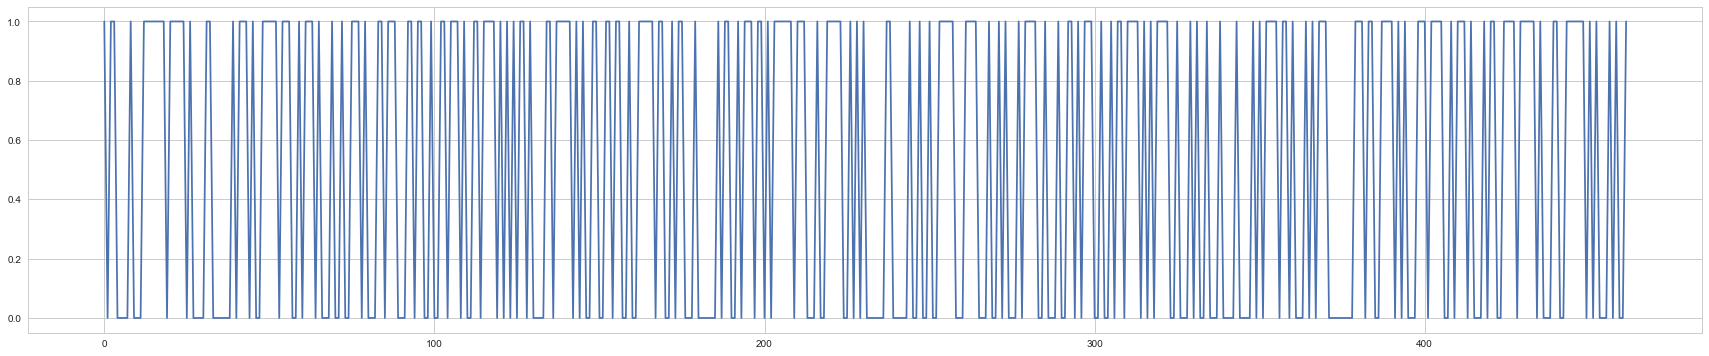

In [138]:
plotar(string_bits)

###### 2. Amostra com números gerados por alguma PRF, sendo o proceso escolhido utilizado apenas para a geração da semente.

Gerador de congruência linear
$X_{n} = (aX_{n-1}+c)\mod m $

In [139]:
m = math.pow(2,31)
a = math.pow(7,5)
c = 7
x = []
# Semente
x.append(int(dataFrame['Maximo'][0]*dataFrame['Variacao_dia_porcentagem'][0]))

Geração dos numeros:

In [140]:
for i in range(1,100):
    x.append((a*x[i-1]+c)%m)
    

In [141]:
string_bits = ''
for i in range(len(x)):
    string_bits+=dec2any(x[i],2)
print(string_bits)
print("Tamanho: ",len(string_bits))
    

1011000010001111011010100011100111010101100010011111010111011111100011011111101001001111101101101101110000111011011100010010110000101111000001100001011100000000001000110100000000100100110100111111110001110101100011001000001111110010101101100100111100111111001111100001010111001011100010100001000111000110100000011111001111111101111000100110100001000110110001100111011011111010001111101001100110110100011110111001111100001101111110000000111010011000000100000001100010000101000010011100001111100100010000000010000011000110101110001001100001110101111100100001011000101100011000011011011011101101010010101011110010100110001000111011001000101110111000101111011000111111111011010010100110000101111000001000001000101000011010100100111101011010110110010011011110001101101010110010101011010011111000100010110011111001000011101101101000111101101111011111010000010110111010010001010001100001000000010000000001111110001000110001101100110100000011011001110111100101110110001111001010111010000000101011011000100100

In [142]:
BlockFrequency(30,len(string_bits),string_bits)

(Entrada)         n =  2966
(Entrada)         M =  30
(Processamento)   N =  98
(Processamento)  X² =  118.39999999999992
(Saída)          P-value =  0.0787333347559
A sequência é aleatória


Número de bits:  2966


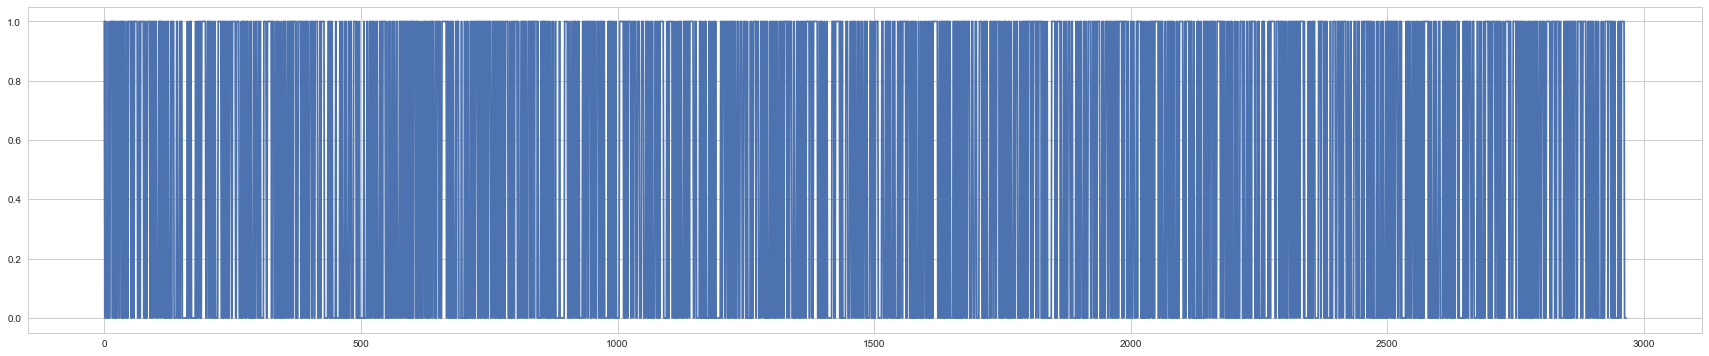

In [143]:
plotar(string_bits)

###### 3.  Abaixo está o código que gera o gráfico de distribuição das amostras.

In [144]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline  
rcParams['figure.figsize'] = 30,6
def plotar(string_bit):
    print('Número de bits: ',len(string_bit))
    X = [x for x in range(len(string_bit))]

    Y = []
    for i in string_bit:
        Y.append(int(i))

    plt.plot(X, Y)
    plt.show()